<a href="https://colab.research.google.com/github/sakinahaulia153/119-Sakinah/blob/main/Tugas_1_Analisis_Big_Data_Sakinah_Aulia_R_P_Adnan_2020_119.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
from plotnine import *
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

# Memanggil semua library agar variabel bisa terpanggil dan program berjaan dengan lancar

# Default
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.offline as py
import plotly
import plotly.graph_objects as go
import seaborn as sns

# Data prepocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Tuning parameter
from sklearn.model_selection import GridSearchCV

# Model
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from keras.optimizers import SGD
from keras.optimizers import Adam
from sklearn.neural_network import MLPClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# result
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score


#retina
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load Datasets
course = pd.read_csv('/content/drive/MyDrive/anonymisedData/courses.csv')
assesment = pd.read_csv('/content/drive/MyDrive/anonymisedData/assessments.csv')
vle = pd.read_csv('/content/drive/MyDrive/anonymisedData/vle.csv')
info_student = pd.read_csv('/content/drive/MyDrive/anonymisedData/studentInfo.csv')
reg_student = pd.read_csv('/content/drive/MyDrive/anonymisedData/studentRegistration.csv')
asses_student = pd.read_csv('/content/drive/MyDrive/anonymisedData/studentAssessment.csv')
vle_student = pd.read_csv('/content/drive/MyDrive/anonymisedData/studentVle.csv')

Pre Processing

In [5]:
asses_student

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


In [6]:
asses_student.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [7]:
asses_student.describe()

,id_assessment,id_student,date_submitted,is_banked,score
count,173912.000000,1.739120e+05,173912.000000,173912.000000,173739.000000
mean,26553.803556,7.051507e+05,116.032942,0.010977,75.799573
std,8829.784254,5.523952e+05,71.484148,0.104194,18.798107
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000
25%,15022.000000,5.044290e+05,51.000000,0.000000,65.000000
50%,25359.000000,5.852080e+05,116.000000,0.000000,80.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000,90.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000


In [8]:
course

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


In [9]:
course.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [10]:
course.describe()

,module_presentation_length
count,22.000000
mean,255.545455
std,13.654677
min,234.000000
25%,241.000000
50%,261.500000
75%,268.000000
max,269.000000


In [11]:
assesment

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


In [12]:
assesment.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [13]:
assesment.describe()

,id_assessment,date,weight
count,206.000000,195.000000,206.000000
mean,26473.975728,145.005128,20.873786
std,10098.625521,76.001119,30.384224
min,1752.000000,12.000000,0.000000
25%,15023.250000,71.000000,0.000000
50%,25364.500000,152.000000,12.500000
75%,34891.750000,222.000000,24.250000
max,40088.000000,261.000000,100.000000


In [14]:
vle

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
...,...,...,...,...,...,...
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN


In [15]:
vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


In [16]:
info_student

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [17]:
info_student.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [18]:
info_student.describe()

,id_student,num_of_prev_attempts,studied_credits
count,3.259300e+04,32593.000000,32593.000000
mean,7.066877e+05,0.163225,79.758691
std,5.491673e+05,0.479758,41.071900
min,3.733000e+03,0.000000,30.000000
25%,5.085730e+05,0.000000,60.000000
50%,5.903100e+05,0.000000,60.000000
75%,6.444530e+05,0.000000,120.000000
max,2.716795e+06,6.000000,655.000000


In [19]:
reg_student

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0


In [20]:
reg_student.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [21]:
reg_student.describe()

,id_student,date_registration,date_unregistration
count,3.259300e+04,32548.000000,10072.000000
mean,7.066877e+05,-69.411300,49.757645
std,5.491673e+05,49.260522,82.460890
min,3.733000e+03,-322.000000,-365.000000
25%,5.085730e+05,-100.000000,-2.000000
50%,5.903100e+05,-57.000000,27.000000
75%,6.444530e+05,-29.000000,109.000000
max,2.716795e+06,167.000000,444.000000


In [22]:
asses_student

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


In [23]:
asses_student.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [24]:
asses_student.describe()

,id_assessment,id_student,date_submitted,is_banked,score
count,173912.000000,1.739120e+05,173912.000000,173912.000000,173739.000000
mean,26553.803556,7.051507e+05,116.032942,0.010977,75.799573
std,8829.784254,5.523952e+05,71.484148,0.104194,18.798107
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000
25%,15022.000000,5.044290e+05,51.000000,0.000000,65.000000
50%,25359.000000,5.852080e+05,116.000000,0.000000,80.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000,90.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000


In [25]:
vle_student

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1


In [26]:
vle_student.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [27]:
vle_student.describe()

,id_student,id_site,date,sum_click
count,1.065528e+07,1.065528e+07,1.065528e+07,1.065528e+07
mean,7.333336e+05,7.383234e+05,9.517400e+01,3.716946e+00
std,5.827060e+05,1.312196e+05,7.607130e+01,8.849047e+00
min,6.516000e+03,5.267210e+05,-2.500000e+01,1.000000e+00
25%,5.077430e+05,6.735190e+05,2.500000e+01,1.000000e+00
50%,5.882360e+05,7.300690e+05,8.600000e+01,2.000000e+00
75%,6.464840e+05,8.770300e+05,1.560000e+02,3.000000e+00
max,2.698588e+06,1.049562e+06,2.690000e+02,6.977000e+03


Data Cleaning

In [28]:
# Cek apakah terdapat nilai yang kosong dan mengetahui tipe data dari semua atribut
print("Course info")
course.info()

print("\nAssesment info")
assesment.info()

print("\nVle info")
vle.info()

print("\nInfo Student info")
info_student.info()

print("\nReg Student info")
reg_student.info()

print("\nAsses Student info")
asses_student.info()

print("\nVle Student info")
vle_student.info()

Course info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes

Assesment info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory 

In [29]:
# Cek apakah terdapat nilai yg kosong
print("Course info")
course.isnull().sum()

Course info


code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64

In [30]:
print("Assesment info")
assesment.isnull().sum()

Assesment info


code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

In [31]:
#Menghapus nilai yang kosong
date_miss = assesment['date'].mode()[0]
assesment['date'].fillna(date_miss, inplace=True)
print(assesment.isnull().sum())

code_module          0
code_presentation    0
id_assessment        0
assessment_type      0
date                 0
weight               0
dtype: int64


In [32]:
print("Vle info")
vle.isnull().sum()

Vle info


id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64

In [33]:
#Menghapus nilai yang kosong
week_from_miss = vle['week_from'].mode()[0]
week_to_miss = vle['week_to'].mode()[0]
vle['week_from'].fillna(week_from_miss, inplace=True)
vle['week_to'].fillna(week_to_miss, inplace=True)
print(vle.isnull().sum())

id_site              0
code_module          0
code_presentation    0
activity_type        0
week_from            0
week_to              0
dtype: int64


In [34]:
print("Student info")
info_student.isnull().sum()

Student info


code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [35]:
#Menghapus nilai yang kosong
imd_band_miss = info_student['imd_band'].mode()[0]
info_student['imd_band'].fillna(imd_band_miss, inplace=True)
print(info_student.isnull().sum())

code_module             0
code_presentation       0
id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
dtype: int64


In [36]:
print("Reg Student info")
reg_student.isnull().sum()

Reg Student info


code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

In [37]:
#Menghapus nilai yang kosong
date_registration_miss = reg_student['date_registration'].mode()[0]
date_unregistration_miss = reg_student['date_unregistration'].mode()[0]
reg_student['date_registration'].fillna(date_registration_miss, inplace=True)
reg_student['date_unregistration'].fillna(date_unregistration_miss, inplace=True)
print(vle.isnull().sum())

id_site              0
code_module          0
code_presentation    0
activity_type        0
week_from            0
week_to              0
dtype: int64


In [38]:
print("Asses Student info")
asses_student.isnull().sum()

Asses Student info


id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

In [39]:
#Menghapus nilai yang kosong
score_miss = asses_student['score'].mode()[0]
asses_student['score'].fillna(score_miss, inplace=True)
print(asses_student.isnull().sum())

id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64


In [40]:
print("Vle Student info")
vle_student.isnull().sum()

Vle Student info


code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

In [41]:
#Menghapus nilai yang kosong
id_student_miss = vle_student['id_student'].mode()[0]
id_site_miss = vle_student['id_site'].mode()[0]
date_miss = vle_student['date'].mode()[0]
sum_click_miss = vle_student['sum_click'].mode()[0]
vle_student['id_student'].fillna(id_student_miss, inplace=True)
vle_student['id_site'].fillna(id_site_miss, inplace=True)
vle_student['date'].fillna(date_miss, inplace=True)
vle_student['sum_click'].fillna(sum_click_miss, inplace=True)
print(vle_student.isnull().sum())

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64


In [42]:
# Cek apakah terdapat nilai yang kosong dan mengetahui tipe data dari semua atribut
print("Course info")
course.info()

print("\nAssesment info")
assesment.info()

print("\nVle info")
vle.info()

print("\nInfo Student info")
info_student.info()

print("\nReg Student info")
reg_student.info()

print("\nAsses Student info")
asses_student.info()

print("\nVle Student info")
vle_student.info()

Course info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes

Assesment info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               206 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory 

In [43]:
course["module_presentation"] = list(map(lambda x,y: str(x) + "_" + str(y), course.code_module, course.code_presentation))
assesment["module_presentation"] = list(map(lambda x,y: str(x) + "_" + str(y), assesment.code_module, assesment.code_presentation))
vle["module_presentation"] = list(map(lambda x,y: str(x) + "_" + str(y), vle.code_module, vle.code_presentation))
info_student["module_presentation"] = list(map(lambda x,y: str(x) + "_" + str(y), info_student.code_module, info_student.code_presentation))
reg_student["module_presentation"] = list(map(lambda x,y: str(x) + "_" + str(y), reg_student.code_module, reg_student.code_presentation))
vle_student["module_presentation"] = list(map(lambda x,y: str(x) + "_" + str(y), vle_student.code_module, vle_student.code_presentation))

print(" In Student Info table; \n # of rows: {} \n # of unique student Ids: {} \n \
Hence, There are different records for same students' different modul enrolments." .format(len(info_student),len(info_student.id_student.unique())))
print("\n This also means that student ID is not really a unique identifier of the table.\n")

 In Student Info table; 
 # of rows: 32593 
 # of unique student Ids: 28785 
 Hence, There are different records for same students' different modul enrolments.

 This also means that student ID is not really a unique identifier of the table.



Mengintegrasikan 2 Variabel

In [45]:
merged_data = pd.merge(info_student, asses_student, on = 'id_student')

In [46]:
merged_data

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation,id_assessment,date_submitted,is_banked,score
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,AAA_2013J,1752,18,0,78.0
1,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,AAA_2013J,1753,53,0,85.0
2,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,AAA_2013J,1754,115,0,80.0
3,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,AAA_2013J,1755,164,0,85.0
4,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,AAA_2013J,1756,212,0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207314,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,GGG_2014J,37437,169,0,60.0
207315,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,GGG_2014J,37438,73,0,100.0
207316,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,GGG_2014J,37439,150,0,60.0
207317,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,GGG_2014J,37440,172,0,100.0


Data Analysis

In [47]:
# Pilih mahasiswa yang belum terdaftar berdasarkan tabel registrasi
temp = reg_student.loc[reg_student.date_unregistration.notna(),\
                               ['id_student','module_presentation','date_unregistration']]

temp =pd.merge(info_student, temp, on=['id_student','module_presentation'])

# Menampilkan mahasiswa yang tidak terdaftar tanpa tanda "Withdrawn" di kolom hasil akhir
wrong_final_results=temp.loc[temp.final_result!='Withdrawn']
incorrect_final_results=wrong_final_results.index
wrong_final_results

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation,date_unregistration
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,AAA_2013J,12.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,AAA_2013J,12.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,AAA_2013J,12.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,AAA_2013J,12.0
5,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass,AAA_2013J,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32587,GGG,2014J,2620947,F,Scotland,A Level or Equivalent,80-90%,0-35,0,30,Y,Distinction,GGG_2014J,12.0
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail,GGG_2014J,12.0
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,GGG_2014J,12.0
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,GGG_2014J,12.0


In [48]:
merged_data.info()
cat_cols  = merged_data.select_dtypes(['object']).columns
int_cols  = merged_data.select_dtypes(['int64']).columns
float_cols = merged_data.select_dtypes(['float']).columns
print(cat_cols)
print(int_cols)
print(float_cols)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207319 entries, 0 to 207318
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   code_module           207319 non-null  object 
 1   code_presentation     207319 non-null  object 
 2   id_student            207319 non-null  int64  
 3   gender                207319 non-null  object 
 4   region                207319 non-null  object 
 5   highest_education     207319 non-null  object 
 6   imd_band              207319 non-null  object 
 7   age_band              207319 non-null  object 
 8   num_of_prev_attempts  207319 non-null  int64  
 9   studied_credits       207319 non-null  int64  
 10  disability            207319 non-null  object 
 11  final_result          207319 non-null  object 
 12  module_presentation   207319 non-null  object 
 13  id_assessment         207319 non-null  int64  
 14  date_submitted        207319 non-null  int64  
 15  

In [49]:
merged_data_type = merged_data.drop(columns = ['id_student'], axis = 1)

In [50]:
merged_data_type.isnull().sum()

code_module             0
code_presentation       0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
module_presentation     0
id_assessment           0
date_submitted          0
is_banked               0
score                   0
dtype: int64

<Axes: >

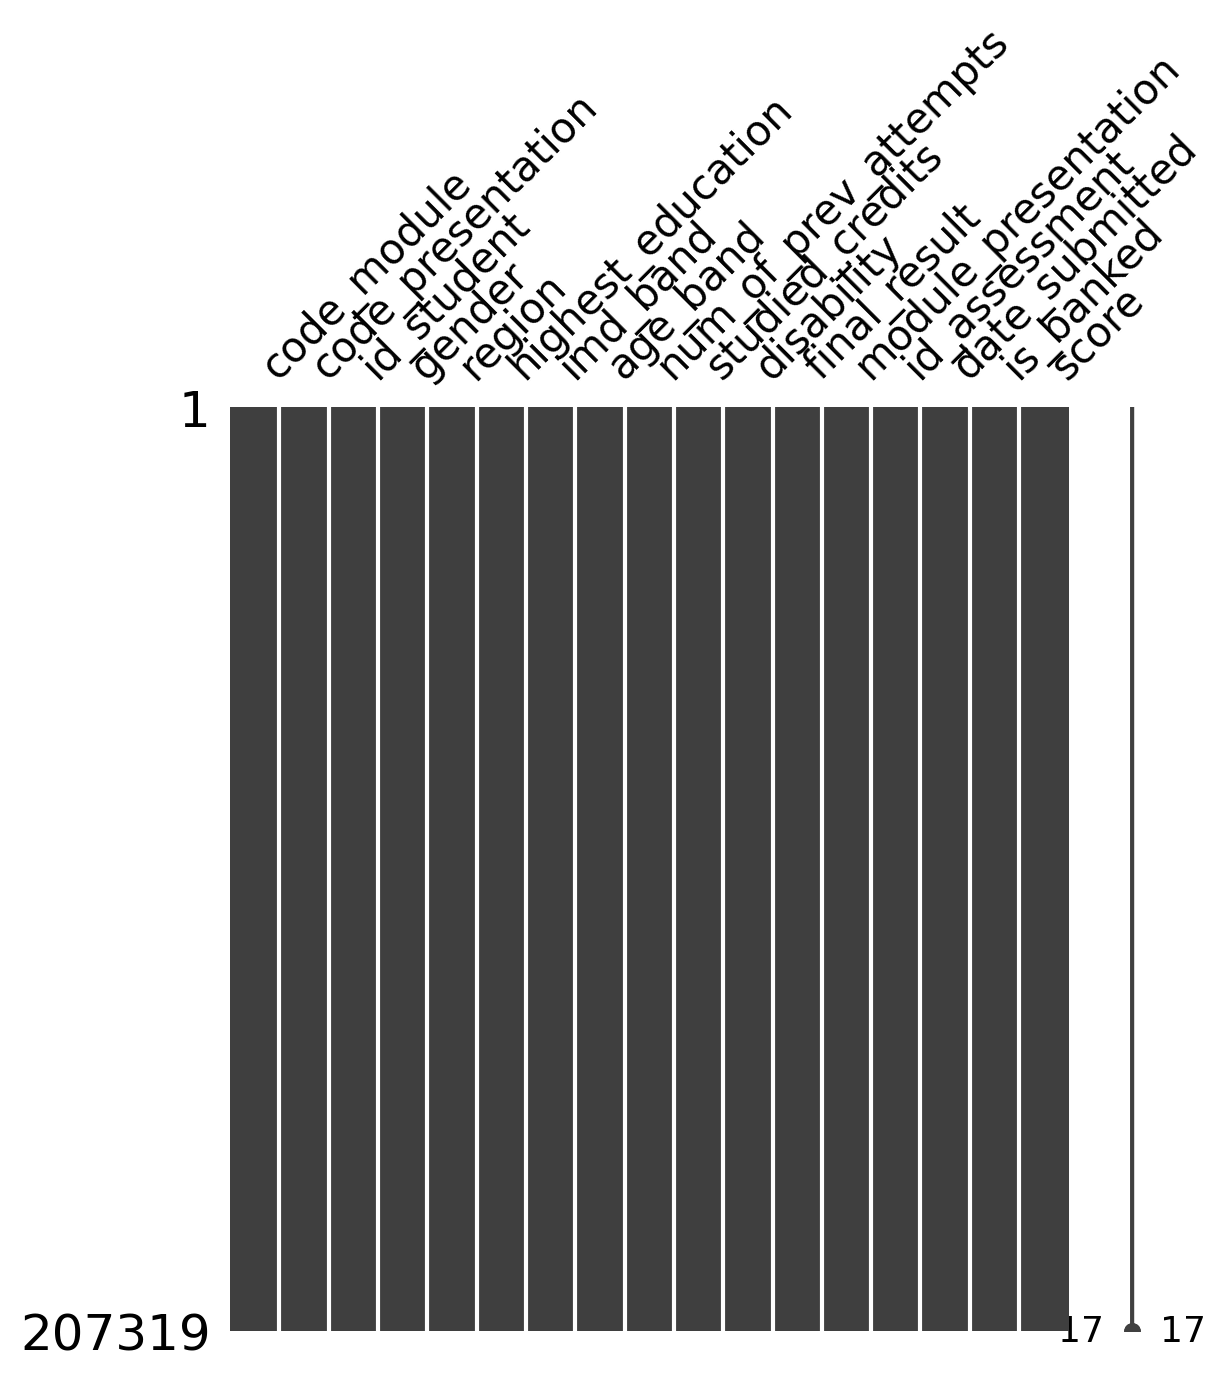

In [51]:
#Melihat Missing Value pada Vle
msno.matrix(merged_data, figsize=(6,6), fontsize=15)

In [52]:
name = merged_data['final_result'].value_counts().index
num = merged_data['final_result'].value_counts().values

fig = px.pie(data_frame=merged_data,names=name,values=num
             ,title='Pies chard show the over all result',width=800,height=600)
fig.update_traces(textposition='inside',textinfo='label+percent')
fig.show()

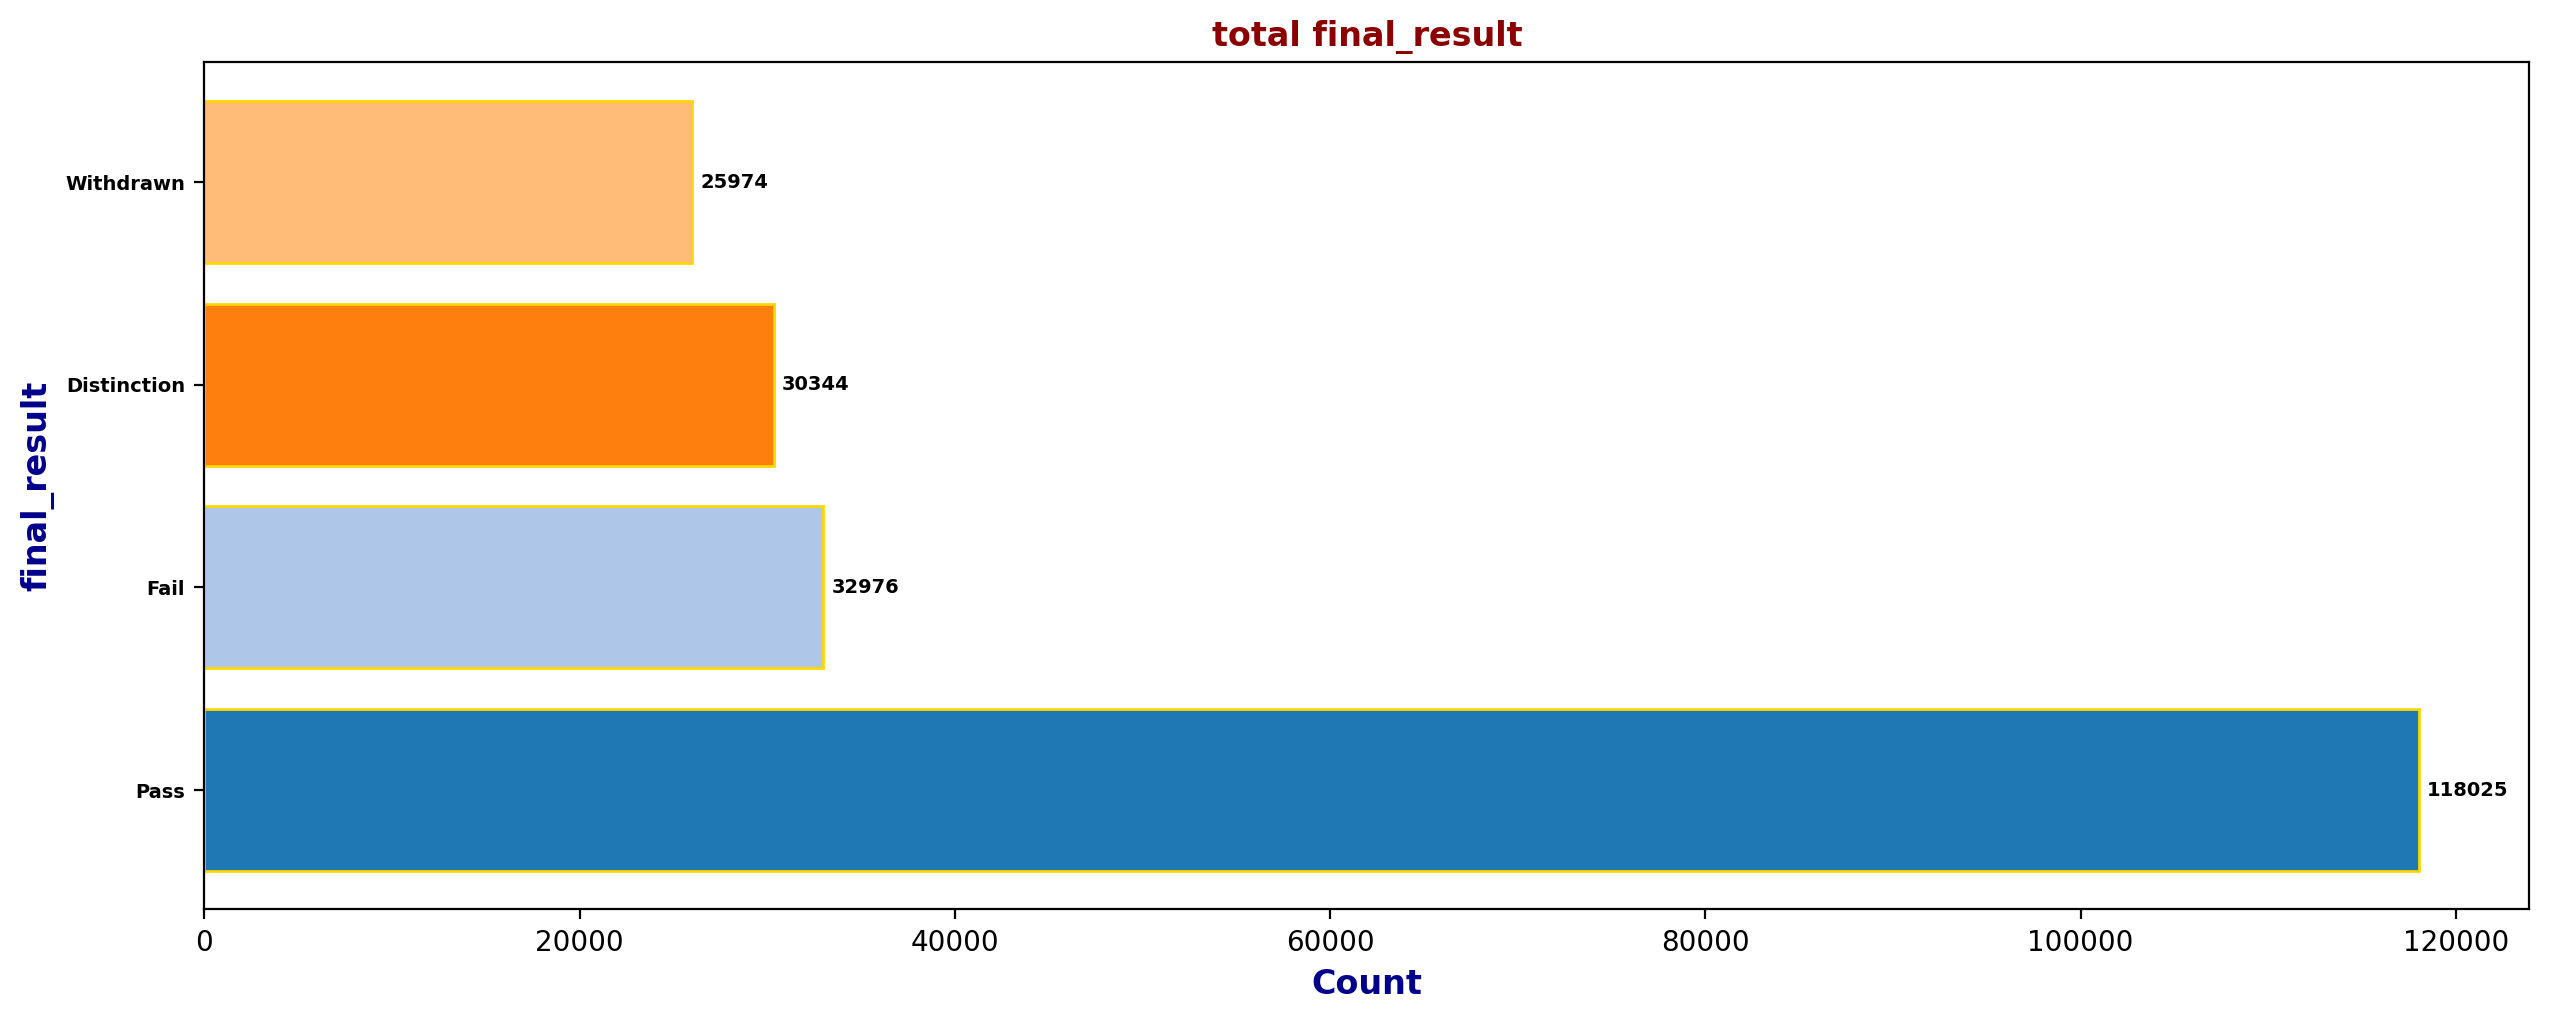

In [53]:
merged_data_popu_prod = merged_data['final_result'].value_counts().to_frame()

labels = merged_data_popu_prod.index.to_list()
values = merged_data_popu_prod.iloc[:,0].values

cmap = plt.get_cmap('tab20')
colors = cmap(np.arange(len(labels)))

fig,ax = plt.subplots(figsize = (15,5.5))
rects = ax.barh(labels, values, linewidth = 1. , edgecolor = 'gold', color = colors)
ax.set_xlabel('Count', fontsize = 12, fontweight = 'bold', color = 'darkblue')
ax.set_ylabel('final_result', fontsize = 12, fontweight = 'bold', color = 'darkblue')
ax.set_yticklabels(labels, fontsize = 7, fontweight = 'bold')
ax.tick_params('x', labelcolor = 'black')
ax.set_title('total final_result', fontsize = 12, fontweight = 'bold', color = 'darkred')

def autolabel(rects):
  for rect in rects:
    width = rect.get_width()
    ax.annotate(text = '{}'.format(width),
                xy = (width, rect.get_y() + rect.get_height()/2),
                xytext = (3,0),
                textcoords = 'offset points',
                ha = 'left',
                va = 'center',
                weight = 'bold',
                size = 7,
                color = 'black')

autolabel(rects)
fig.show()

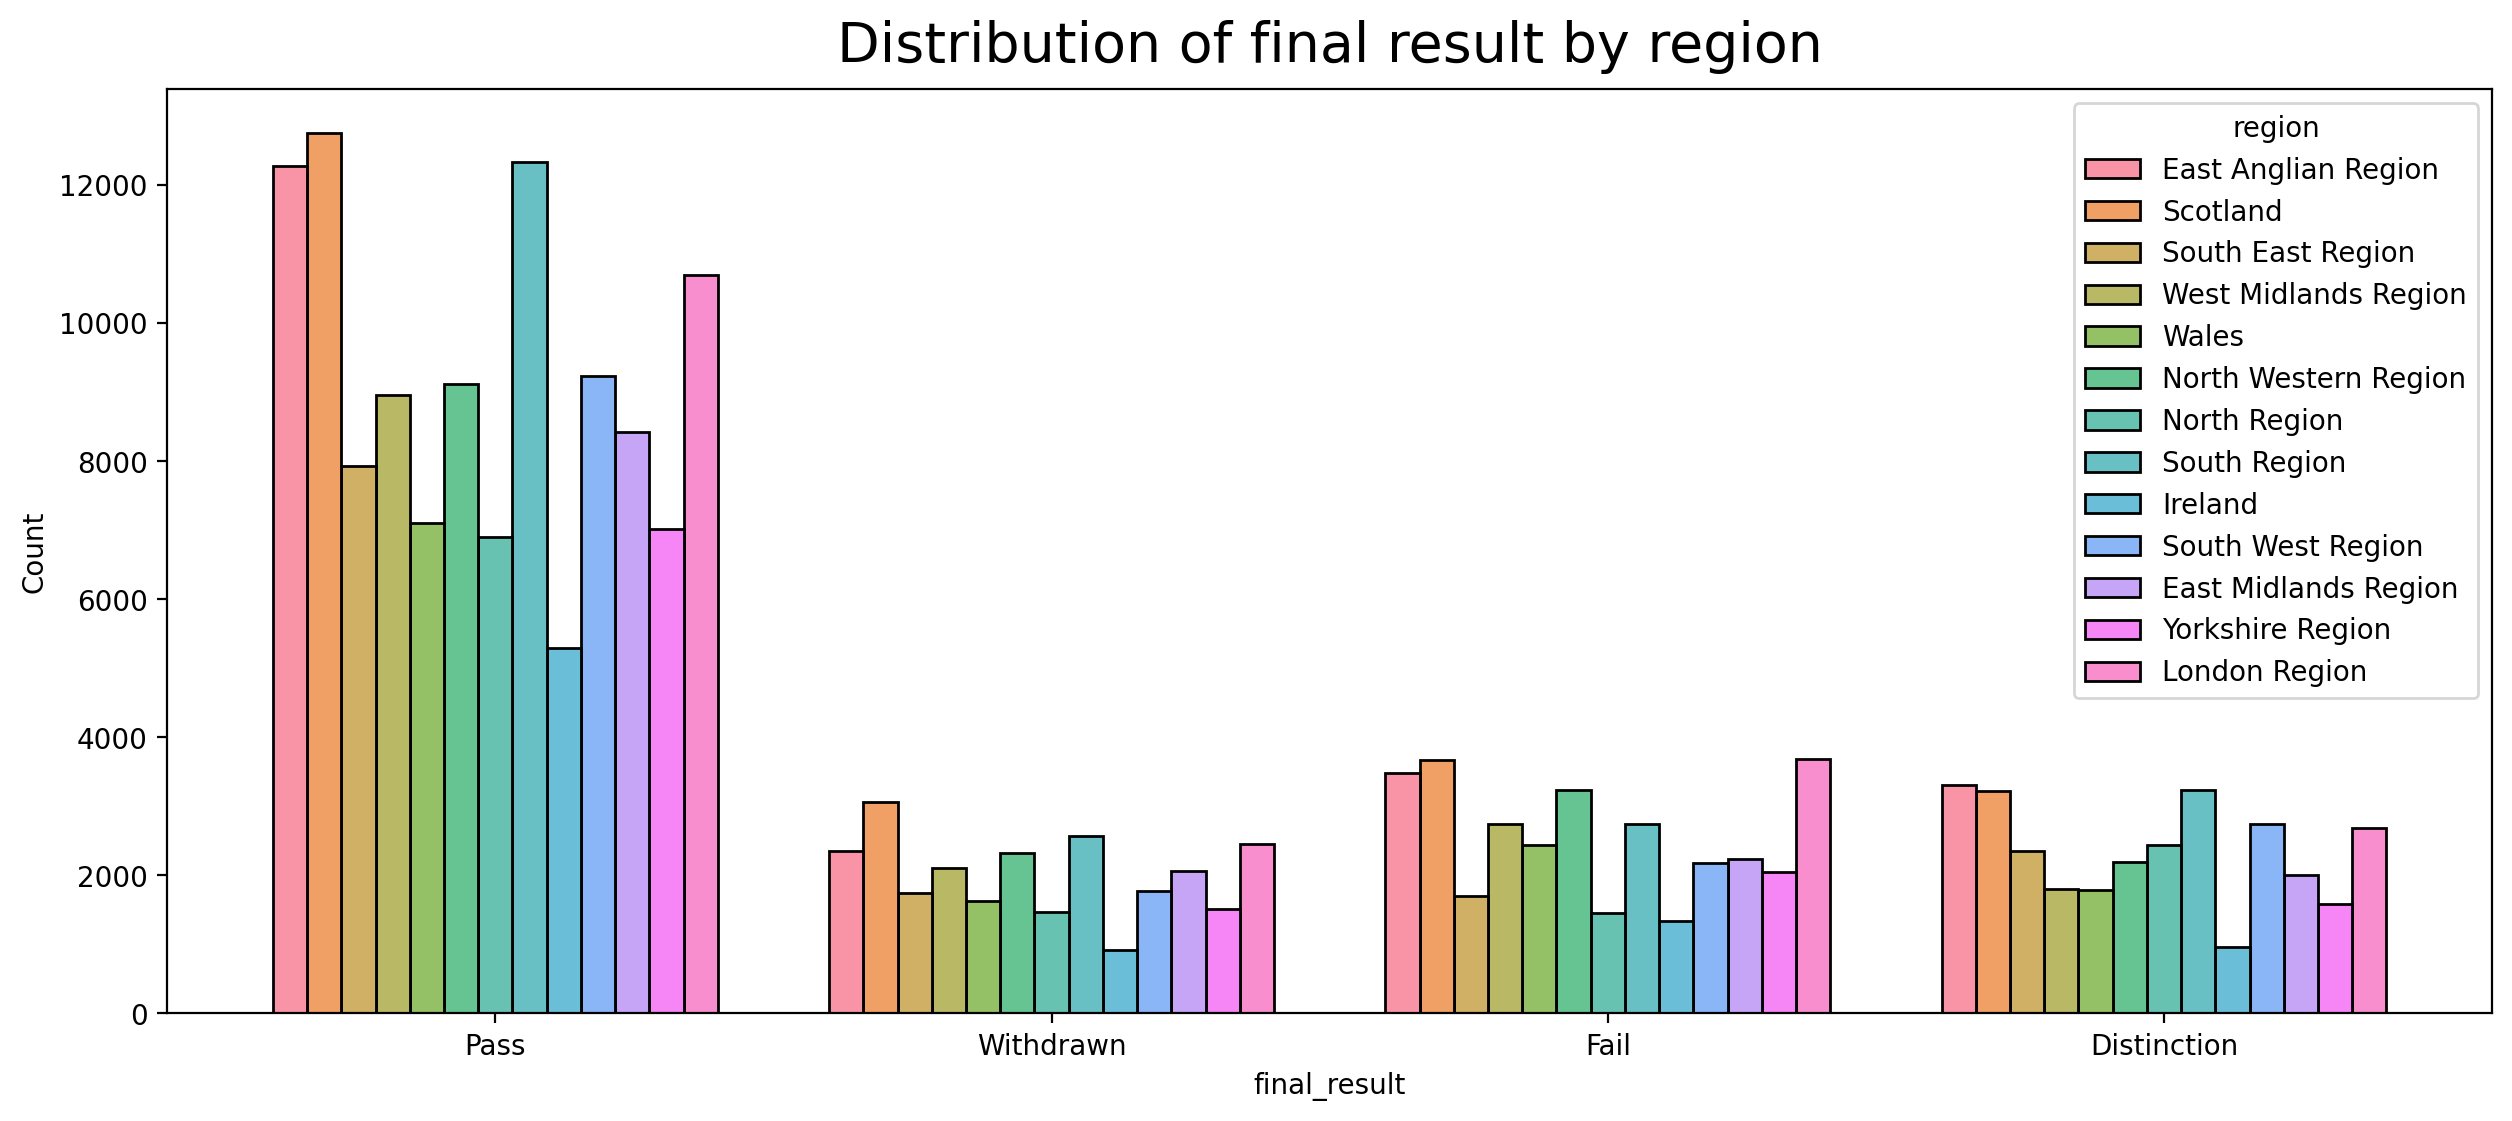

In [54]:
plt.figure(figsize = (15,6))
sns.histplot(data = merged_data_type, hue = 'region', x = 'final_result',multiple = 'dodge', shrink = 0.8)
plt.title('Distribution of final result by region', loc = 'center', pad = 10, size = 20)
plt.show()